<p align='right'>Jonas Stettner - 30.01.2023</p>

# A simple model of global cascades on random networks


Watts, D. J. (2002). Proc. Natl. Acad. Sci. U.S.A., 99(9), 5766–5771. doi: 10.1073/pnas.082090499

In [3]:
import networkx as nx
import matplotlib
import scipy
import random
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from scripts.model import simple_model
from scripts.graphics import animate_g
from scripts.helpers import col_nodes_phi, col_nodes_state, col_nodes_current
from scripts.load_data import G_hamst

## Cascades
Remember this guy?
<p align="center">
      <img src="images/dancing_guy.jpg" align="left width="200"  height="200" hspace="20">
      <img src="images/evacuate.jpg" align="right" width="200" height="200" hspace="20">
</p>
<p align='right'>Fig. 1, Fig. 2</p>

## Agenda
1. Recap
    <ol style="list-style-type: upper-alpha">
    <li>Cascades</li>
    <li>Network Position and Influence</li>
    <li>Random Network Models vs. Real Networks</li>
     <li>Phase Transitions</li>
    </ol>
2. Theoretical Background
    <ol style="list-style-type: upper-alpha">
    <li>Information Cascades</li>
    <li>Binary Decision with externalities</li>
    </ol>
3. Today's model
4. Analytical Solution
5. Simulation

## Recap: Cascades
### Online social network resilience
- (Rational) decision to stay in network: **net benefit > 0**
- Benefits (content, attention) are proportional to active friends ($k_u$)
- User with $k_u < K$ leave network
    - this causes other users to also not have enough connections -> **evacuate the dancefloor**
    - only k-core (all users that have at least K friends) remains
- Effect of value of K on active users -> resilience function


<p align='right'>(dgarcia-eu, 2023)</p>

## Recap: Network position and influence - Centrality
- Identifying nodes that could potentially cause large cascades with centrality measures -> spreading capability
- Degree Centrality
    - Simply the degree of a node
- K-Shell decomposition
    - Removing nodes with k, k+1, k+2 ... and assigning the corresponding $k_s$ to the nodes until graph is empty
    - k-shell index itself is a centrality measure
- Coreness centrality
    - Taking into account degree of node plus the k_s of its neighbours
- Core centrality was proven to be a more accurate/reliabel measure of spreading capability


<p align='right'>(Goldbeck, 2015), (Kitsak et al., 2010), (Bae et al., 2014)</p>


## Recap: Random Network Models vs. Empirical Networks
- Number of nodes is fixed
- $G(n,m)$
    - choose m pairs of nodes from all possible pairs and connect them with edge (m edges)
    - number of edges (m) is fixed
- $G(n,p)$
    - fixed probability of edges (p)
    - edge between each possible pair of nodes with probability p
- Empirical networks:
  - average path length similar
  - higher clustering coefficient


<p align='right'>(Newman, 2010),(Frieze et al. ,2015)(dgarcia-eu, 2023)(</p>

## Recap: Phase Transitions
### Granovetter's threshold model:
- Threshold to join a riot: **net benefit > 0**
- Decision based how many other people participate (influences benefits and costs -> rational decision)
- **Phase transition**: small changes in model parameters (threshold standard deviation, threshold sequence) lead to sudden disproportionately big change in outcome


<p align='right'>(Granovetter, 1978), (dgarcia-eu, 2023)</p>

## Theoretical Background
### Information Cascades
- Small initial shock disrupts large stable system
- e.g. some people stop to wear masks -> almost nobody wears a mask anymore (assuming wearing a mask was stable for some time)
- "(i) global (i.e., very large) cascades can be triggered by exogenous events (shocks) that are very small relative to the system size, and (ii) global cascades occur rarely relative to the number of shocks that the system receives, and may be triggered by shocks that are a priori indistinguishable from shocks that do not."

## Theoretical Background
### Binary Decision with externalities

- Many complex real world scenarios boil down to a binary choice
- Choice depends exclusively on the choices of other people
    - e.g. because of net benefit, lack of information
    - Rational choice or conformity (see Asch conformity experiments)?

## Todays model
### Dynamics
- Agents are either in state 1 or 0
- Observes current states of $k$ neighbours
- Adopts state 1 if fraction of neighbours $>= \phi$ (threshold)
- Each agent is assigned a $\phi$ drawn from a distribution $f(\phi)$
- $f(\phi)$ with $x \in [0, 1]$ and $ \int_{1}^{0} f(\phi)d\phi = 1$
- Construct a network of $n$ agents, in which each agent is connected to $k$ neighbors with probability $p_k$ and the average number of neighbors is $〈k〉 = z$
- At $t=0$, $\Phi_0 << 1$ of agents switch to 1 (instigators/innovators)

## Todays model
### Choice of network model
- sparse graph: $z << n$
- undirected
- For the analytical solution:
    - arbitrary random graph
- For the simulation:
    - uniform random graph
    - every possible pair of nodes is connected with $p=z/n$
    - z is variable

## Todays model
- cascade: event of any size triggered by an initial seed
- global cascade:
  - finite fraction of an infinite network/fixed fraction of large finite network
- The authors want to predict:
    - the probability that a global cascade will be triggered by a single node
    - the expected size of a global cascade once it is triggered

## Analytical solution
### Intuition 1
- assumption: no short cycles
- one neighbour has to have $\phi \leq  1/k$
- vulnerable (early adopters) vs stable nodes

## Analytical solution
### Intuition 2
- probability of cascade depends on early adopters
- size of cascade depends on connectedness of early adopters
    - to each other
    - to nodes that can be influenced indirectly by multiple early adopters
- **cascade condition**:
    - "only if the largest vulnerable cluster percolates are global cascades possible"

## Analytical solution
### Maths
- percolation problem
- solved with generating functions
- Cascade condition:
$$G_{n}^0(1) = \Sigma k(k-1)\rho_kp_k=z $$
- Approach explained in detail elsewhere (Newman et al., 2001)

## Simulation

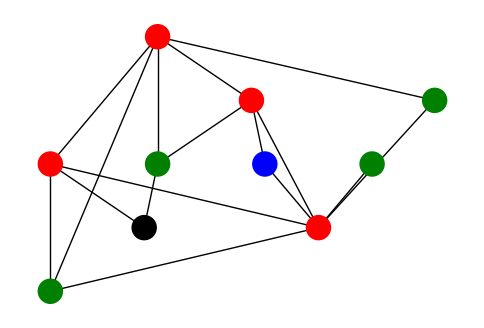

In [4]:

lst = simple_model(n=10,z=4, phi=0.3, upper_phi=1)
initial = lst[0][0]
end  = lst[-1][-1]

lst = simple_model(n=10, z=4, phi=0.3, upper_phi=1)

animate_g(lst, fps=0.5)



## Sources

- Granovetter, M. (1978). Threshold Models of Collective Behavior on JSTOR. American Journal of Sociology, 83(6), 1420–1443. Retrieved from https://www.jstor.org/stable/2778111
- dgarcia-eu. (2023, January 28). CMSS-Konstanz. Retrieved from https://github.com/dgarcia-eu/CMSS-Konstanz accessed 28 Jan. 2023.
- Golbeck, J. (2015). Chapter 21 - Analyzing networks. Introduction to Social Media Investigation. Syngress. doi: 10.1016/B978-0-12-801656-5.00021-4
- Kitsak, M., Gallos, L. K., Havlin, S., Liljeros, F., Muchnik, L., Stanley, H. E., & Makse, H. A. (2010). Identification of influential spreaders in complex networks. Nat. Phys., 6, 888–893. doi: 10.1038/nphys1746
- Bae, J., & Kim, S. (2014). Identifying and ranking influential spreaders in complex networks by neighborhood coreness. Physica A, 395, 549–559. doi: 10.1016/j.physa.2013.10.047
- Newman, Mark, Networks: An Introduction, 1st edn (Oxford, 2010; online edn, Oxford Academic, 1 Sept. 2010), https://doi.org/10.1093/acprof:oso/9780199206650.001.0001
- Frieze, A., & Karoński, M. (2015). Introduction to Random Graphs. Cambridge University Press. doi: 10.1017/CBO9781316339831
- Newman, M. E. J., Strogatz, S. H., & Watts, D. J. (2001). Random graphs with arbitrary degree distributions and their applications. Phys. Rev. E, 64(2), 026118. doi: 10.1103/PhysRevE.64.026118

### Figures
- Fig. 1: dkellerm. (2009, May 26). Sasquatch music festival 2009 - Guy starts dance party. Youtube. Retrieved from https://www.youtube.com/watch?v=GA8z7f7a2Pk
- Fig. 2: Evacuate The Dancefloor. (2023, January 28). Retrieved from https://open.spotify.com/album/05f1Ze9FcQDIopTNcwctAq